In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

#load dataset
df=pd.read_csv('climate_action_data.csv')


In [2]:
#inspect data structure
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [3]:
#size of the dataset
df.shape


(913, 10)

In [4]:
#check for missing cells
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
#check for cells with 'error' string
df[df.apply(lambda row: row.astype(str).str.contains('error').any(), axis=1)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
107,SEN-1107,2025-04-18,error,error,error,error,Tomatoes,error,error,IMG-2107
118,SEN-1118,2025-04-29,error,error,error,error,Beans,error,error,IMG-2118
244,SEN-1244,2025-09-02,error,error,error,error,Wheat,error,error,IMG-2244
459,SEN-1459,2026-04-05,error,error,error,error,Lettuce,error,error,IMG-2459
683,SEN-1683,2026-11-15,error,error,error,error,Maize,error,error,IMG-2683


In [6]:
#Replace 'error' Strings with NaN
df.replace('error', np.nan, inplace=True)

In [7]:
#checking for error strings after replacing them with NaN
df[df.apply(lambda row: row.astype(str).str.contains('error').any(), axis=1)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID


In [8]:
#checking for empty cells affer replacing errors with NaN
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [9]:
#Check Data Types
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [10]:

col = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
       'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

# Convert columns to numeric, forcing  'error' to NaN
for c in col:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Now fill missing values with median
df[col] = df[col].fillna(df[col].median())

#For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
        
        # Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [12]:
# Remove duplicates
df = df.drop_duplicates()

In [13]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [14]:
print("Number of duplicate dates:", df['Date'].duplicated().sum())

Number of duplicate dates: 3


In [15]:
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

In [16]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [33]:
df.shape

(799, 10)

In [17]:
#Descriptive dataset
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


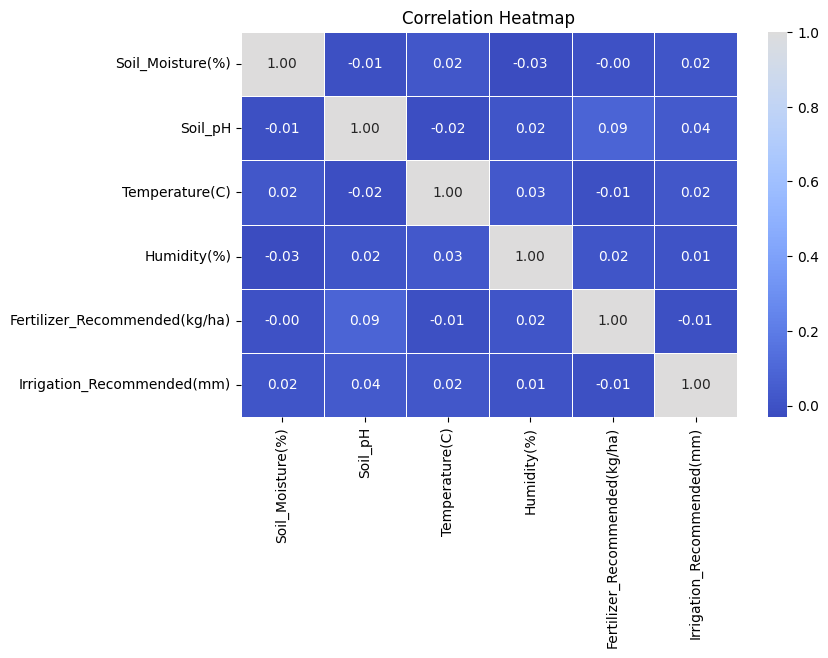

In [18]:
# Analysis
# Correlation Analysis
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
       'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
avg_moisture_by_crop = df.groupby("Crop_Type")["Soil_Moisture(%)"].mean().sort_values(ascending=False)
print(avg_moisture_by_crop)


Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    44.015719
Lettuce     42.932100
Name: Soil_Moisture(%), dtype: float64


In [21]:
avg_temperature_by_crop = df.groupby("Crop_Type")["Temperature(C)"].mean().sort_values(ascending=False)
print(avg_temperature_by_crop)


Crop_Type
Maize       27.010323
Beans       26.898675
Tomatoes    26.172455
Wheat       26.171591
Lettuce     26.155333
Name: Temperature(C), dtype: float64


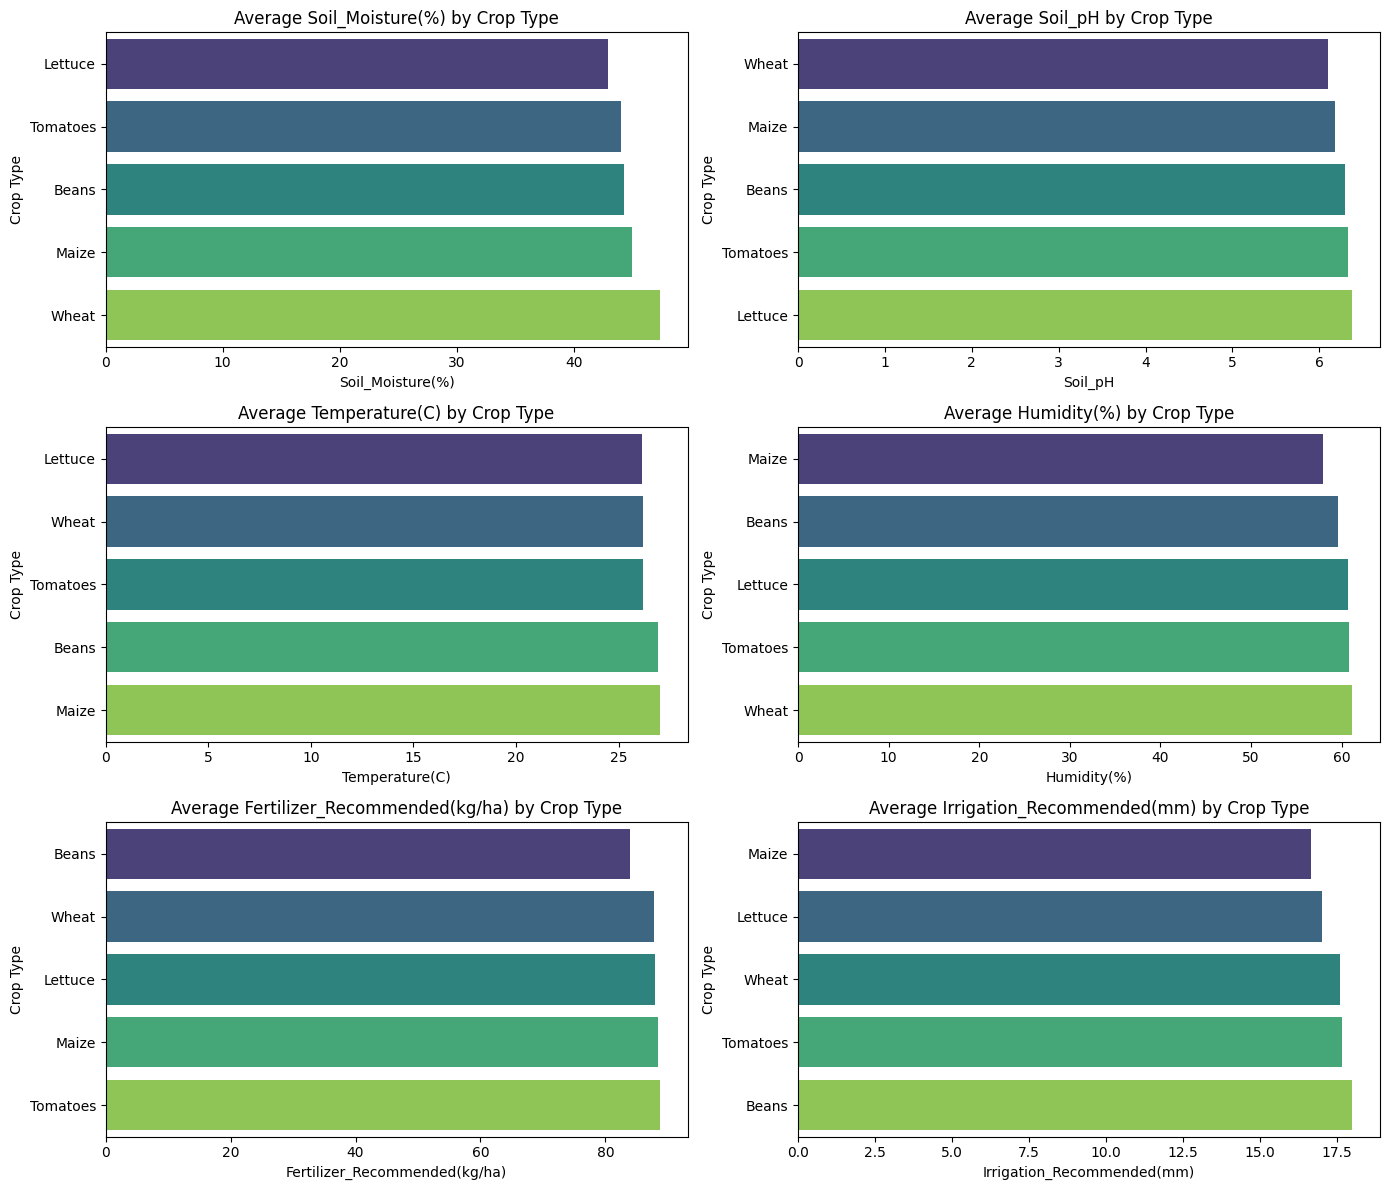

In [42]:

# List of numeric columns to compare
numeric_columns = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Set up subplot grid
n_cols = 2
n_rows = (len(numeric_columns) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Plot
for i, col in enumerate(numeric_columns):
    avg_by_crop = df.groupby('Crop_Type')[col].mean().sort_values()
    
    # Create DataFrame for Seaborn's hue fix
    data = avg_by_crop.reset_index()
    sns.barplot(
        data=data,
        x=col,
        y='Crop_Type',
        ax=axes[i],
        hue='Crop_Type',
        palette='viridis',
        legend=False
    )
    
    axes[i].set_title(f'Average {col} by Crop Type')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Crop Type')


plt.tight_layout()
plt.show()


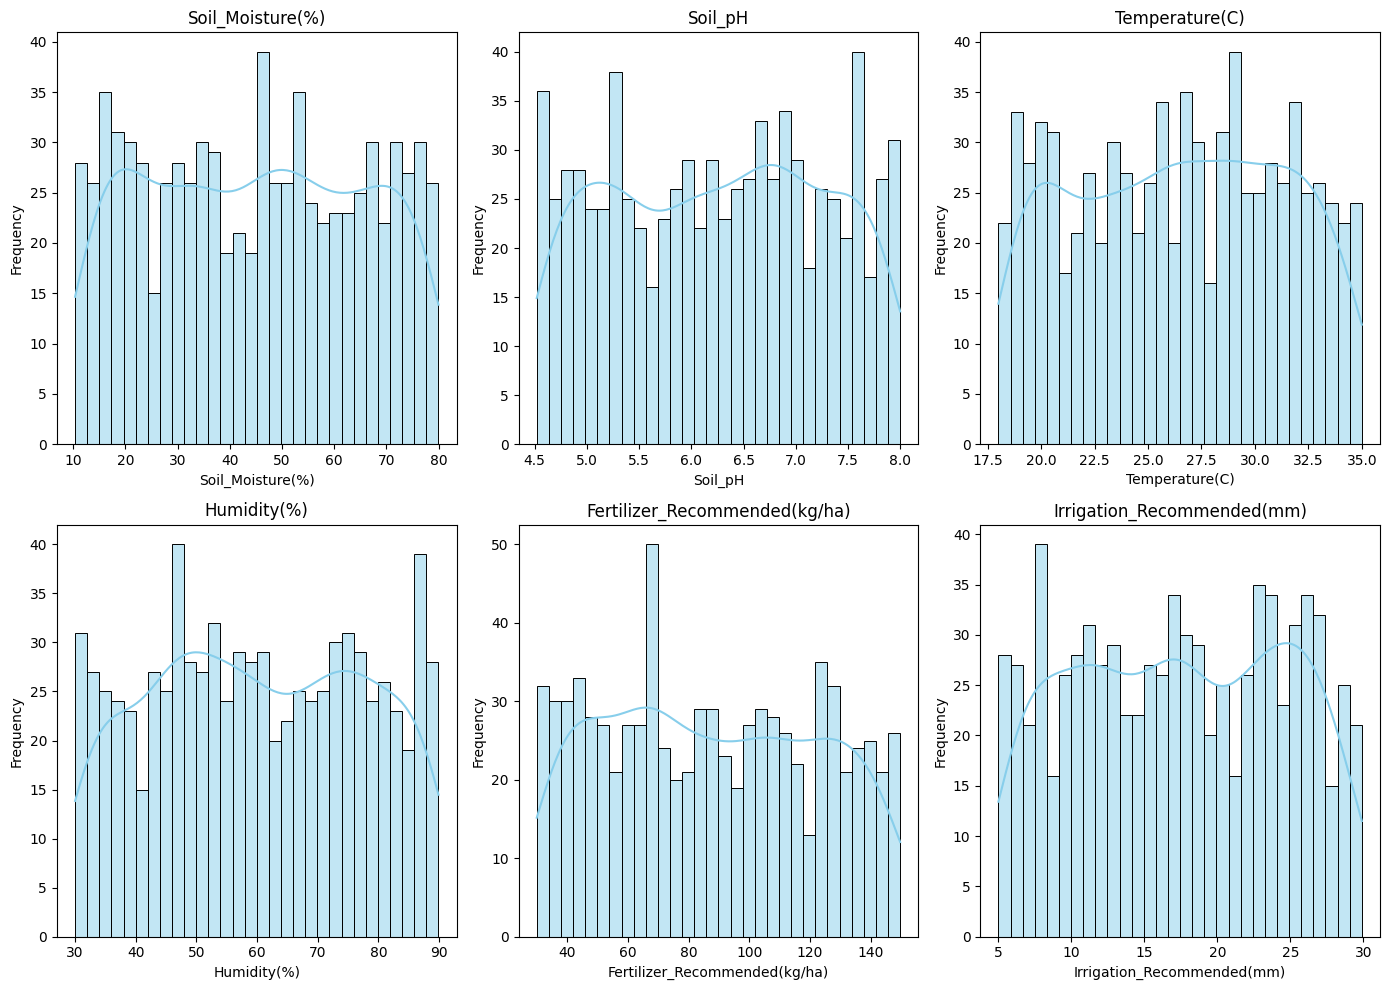

In [43]:
# List of numeric columns to plot
columns = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Set up the plot layout
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns of plots
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [44]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)


In [ ]:
#The dataset was successfully cleaned by removing duplicates, converting incorrect formats, and handling missing values using median imputation for numerical columns.
#Erroneous string entries such as 'error' were replaced with NaN, and the dataset was normalized to ensure consistency across numeric columns.

#Identify which variables most influence fertilizer recommendations.
#soil pH slightly influences fertilizer recommendations and humidity also influences it least

#Determine the crop type with the highest average soil moisture.
# wheat

#Suggest irrigation adjustments for crops experiencing average temperatures above 30°C.
#For crops experiencing average temperatures > 30°C, increase irrigation based on moisture sensor feedback to prevent heat stress and yield loss.

#Provide a summary of insights and recommendations based on the analysis.

#1.Since temperature, soil moisture, and humidity strongly influence fertilizer recommendations, these should be monitored closely with real-time sensors for precision application.
#2.Though less correlated with other variables, soil pH remains critical for nutrient uptake. Specific crops may require soil amendment if pH is outside optimal range.
#3.The cleaned dataset is now well-suited for building predictive models that estimate resource needs or classify optimal crop types based on environmental input data.

#The cleaned dataset was exported as:
#cleaned_precision_agriculture_data.csv and is ready for modeling, deployment, or further agronomic research.


